## Marching Cubes with Laplacian Smoothing
(This Lab demands the package [PyMCubes](https://github.com/pmneila/PyMCubes) and [scikit-image](http://scikit-image.org))

In [1]:
import numpy as np
import mcubes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def fun(x, y, z):
    # you can make this whatever you'd like
    return np.cos(x) + np.cos(y) + np.cos(z)

# grid size
n = 30j   # complex number bc mgrid receives complex as input

# create 3D grid
X, Y, Z = np.pi*np.mgrid[-1:1:n,-1:1:n,-1:1:n]

# defining a function in the grid
f = fun(X,Y,Z)

#computing the isosurface 0
vertices, triangles = mcubes.marching_cubes(f, 0)


# mcubes do not return a consistent mesh
# vertices are repeated in the list of vertices
print(vertices[np.where(vertices[:,0]==0.)])

[[  0.           7.91367592  12.        ]
 [  0.           8.          11.85756585]
 [  0.           7.91367592  12.        ]
 [  0.           7.49317011  13.        ]
 [  0.           7.49317011  13.        ]
 [  0.           7.27788394  14.        ]
 [  0.           7.27788394  14.        ]
 [  0.           7.27788394  15.        ]
 [  0.           7.27788394  15.        ]
 [  0.           7.49317011  16.        ]
 [  0.           7.49317011  16.        ]
 [  0.           7.91367592  17.        ]
 [  0.           7.91367592  17.        ]
 [  0.           8.          17.14243415]
 [  0.           8.53860904  11.        ]
 [  0.           9.          10.41669459]
 [  0.           8.53860904  11.        ]
 [  0.           8.          11.85756585]
 [  0.           8.53860904  18.        ]
 [  0.           8.          17.14243415]
 [  0.           8.53860904  18.        ]
 [  0.           9.          18.58330541]
 [  0.           9.35946177  10.        ]
 [  0.          10.           9.35

In [21]:
# use scikit-image's marching cubes ignore those repeat vertices
from skimage.measure import marching_cubes_lewiner as mc_lewiner

vertices, triangles, normals, values = mc_lewiner(f, 0)

print(vertices.shape)
print(triangles.shape)

(3336, 3)
(6344, 3)


In [16]:
# Computing the Laplacian smoothing (FILL IN THE FOLLOWING)

n = vertices.shape[0]
L = np.zeros((n,n))

# LUIS'S METHOD (simplest computationally, maybe not most intuitive) #
# build L grid ((i, j) is weighted = 1 if a triangle has a corner there)

# compute the diagonal matrix, contribution ration from each vert (1/N bit from equation)

# smoothed vertices will be D dot (L dot vertices)



<IPython.core.display.Javascript object>


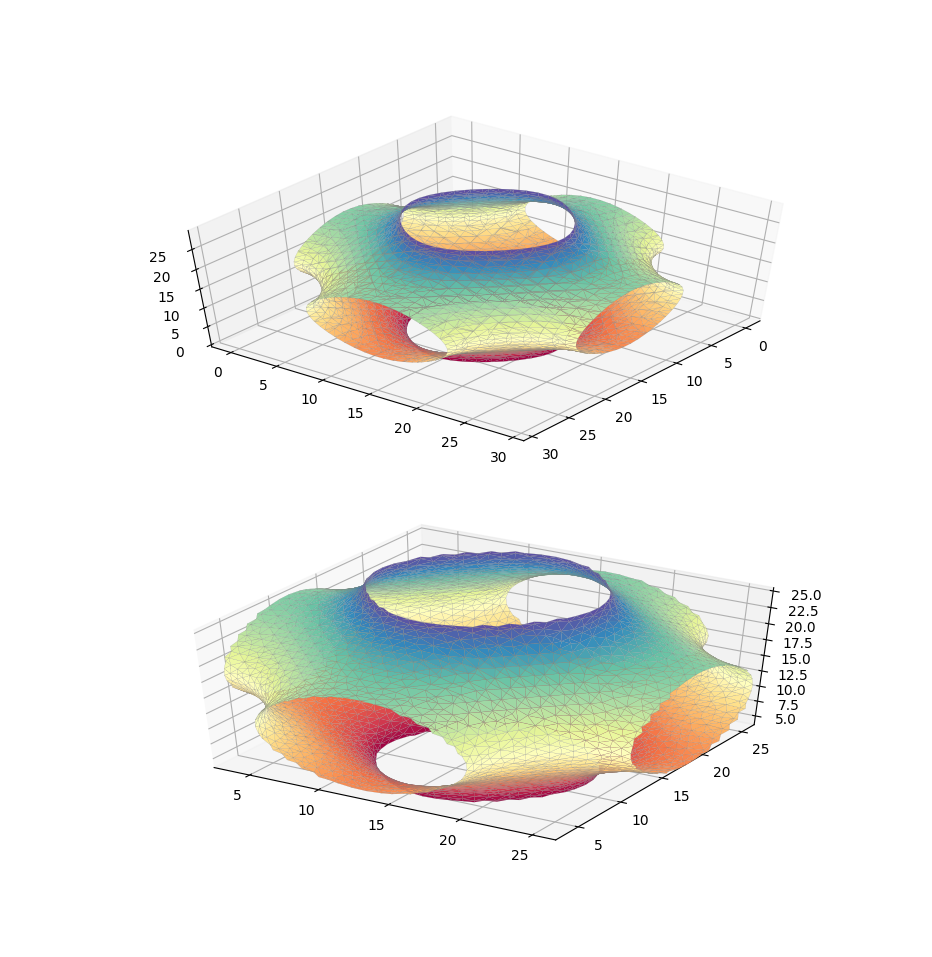

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_trisurf(vertices[:, 0], vertices[:,1], vertices[:, 2], triangles = triangles,
                cmap='Spectral',edgecolor='Gray',lw=0.1)



ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_trisurf(smoothed_vertices[:, 0], smoothed_vertices[:,1], smoothed_vertices[:, 2], triangles = triangles,
                cmap='Spectral',edgecolor='Gray',lw=0.1)

plt.show()


In [22]:
# the following is a plot to see how the distribution of angles
# changes as a result of the smoothing
# measuring the mesh quaity via histograms

import math

# we use the measure 1 - cossine(ang_min), where ang_min is the smollets angle of the triangle  
def smallest_angle(tri,vert):
    smallest_angles = np.zeros((tri.shape[0],))
    for i in range(tri.shape[0]):
        list_angles = []
        for j in range(3):
            v1 = vert[tri[i,int(math.fmod(j-1,3))]]-vert[tri[i,j]]
            v2 = vert[tri[i,int(math.fmod(j+1,3))]]-vert[tri[i,j]]
            list_angles.append(np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))))
        smallest_angles[i] = min(list_angles)
    return(smallest_angles)
    
sa_mc = smallest_angle(triangles,vertices)
sa_mc_smoothed = smallest_angle(triangles,smoothed_vertices)

plt.subplot(1,2,1)
plt.hist(sa_mc,50)
plt.subplot(1,2,2)
plt.hist(sa_mc_smoothed,50)


'\n# measuring the mesh quaity via histograms\n\nimport math\n\n# we use the measure 1 - cossine(ang_min), where ang_min is the smollets angle of the triangle  \ndef smallest_angle(tri,vert):\n    smallest_angles = np.zeros((tri.shape[0],))\n    for i in range(tri.shape[0]):\n        list_angles = []\n        for j in range(3):\n            v1 = vert[tri[i,int(math.fmod(j-1,3))]]-vert[tri[i,j]]\n            v2 = vert[tri[i,int(math.fmod(j+1,3))]]-vert[tri[i,j]]\n            list_angles.append(np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))))\n        smallest_angles[i] = min(list_angles)\n    return(smallest_angles)\n    \nsa_mc = smallest_angle(triangles,vertices)\nsa_mc_smoothed = smallest_angle(triangles,smoothed_vertices)\n\nplt.subplot(1,2,1)\nplt.hist(sa_mc,50)\nplt.subplot(1,2,2)\nplt.hist(sa_mc_smoothed,50)\n'